<a href="https://colab.research.google.com/github/Q-annnnn/USTH_Machine_learning_2/blob/main/Mamo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data", names = ["BI-RADS assessment", "Age", "Shape", "Margin", "Density", "Severity"]).fillna(0)
df = df.replace(["?"], 0)
df

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,0,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,0,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [ ]:
data = df.iloc[:,1:5]
data

,Age,Shape,Margin,Density
0,67,3,5,3
1,43,1,1,0
2,58,4,5,3
3,28,1,1,3
4,74,1,5,0
...,...,...,...,...
956,47,2,1,3
957,56,4,5,3
958,64,4,5,3
959,66,4,5,3


In [ ]:
target = df.iloc[:,5:]
target

,Severity
0,1
1,1
2,1
3,0
4,1
...,...
956,0
957,1
958,0
959,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [ ]:
X_train

,Age,Shape,Margin,Density
445,66,1,4,3
227,55,1,0,1
602,63,4,4,3
205,72,4,5,3
491,52,4,5,3
...,...,...,...,...
492,53,1,1,3
549,69,3,4,3
878,50,3,2,3
19,40,1,0,0


In [ ]:
y_train = np.ravel(y_train)

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
knn_Y_pred1 = knn1.predict(X_test)
knn_accuracy1=metrics.accuracy_score(y_test,knn_Y_pred1)
knn_accuracy_pc1=knn_accuracy1*100
print("Error on training dataset of k = ",3 , ": {:.2f}%".format(100-knn_accuracy_pc1) )

Error on training dataset of k =  3 : 23.53%


In [ ]:
knnq = KNeighborsClassifier(n_neighbors = 3)
knnq.fit(X_train, y_train)
knn_Y_predq = knnq.predict(X_test)
knn_accuracyq=metrics.accuracy_score(y_test,knn_Y_predq)*100

print("Accuracy on training dataset : {:.2f}%".format(knn_accuracyq) )

Accuracy on training dataset : 76.47%


In [ ]:
for i in range (1,16):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  knn_Y_pred = knn.predict(X_test)
  knn_accuracy=metrics.accuracy_score(y_test,knn_Y_pred)
  knn_accuracy_pc=knn_accuracy*100
  print("Error on training dataset of k = ",i , ": {:.2f}%".format(100-knn_accuracy_pc) )

Error on training dataset of k =  1 : 25.61%
Error on training dataset of k =  2 : 30.10%
Error on training dataset of k =  3 : 23.53%
Error on training dataset of k =  4 : 25.61%
Error on training dataset of k =  5 : 20.07%
Error on training dataset of k =  6 : 21.45%
Error on training dataset of k =  7 : 21.11%
Error on training dataset of k =  8 : 21.45%
Error on training dataset of k =  9 : 21.11%
Error on training dataset of k =  10 : 21.11%
Error on training dataset of k =  11 : 22.49%
Error on training dataset of k =  12 : 21.45%
Error on training dataset of k =  13 : 22.49%
Error on training dataset of k =  14 : 21.45%
Error on training dataset of k =  15 : 22.49%


In [ ]:
normalized_x = normalize(data)
normalized_x

array([[0.99524465, 0.04456319, 0.07427199, 0.04456319],
       [0.99945961, 0.02324325, 0.02324325, 0.        ],
       [0.9926502 , 0.06845863, 0.08557329, 0.05134398],
       ...,
       [0.9939518 , 0.06212199, 0.07765248, 0.04659149],
       [0.99430973, 0.0602612 , 0.07532649, 0.0451959 ],
       [0.99650643, 0.04821805, 0.04821805, 0.04821805]])

In [ ]:
n_X_train, n_X_test, n_y_train, n_y_test = train_test_split(normalized_x,target,test_size=0.3)

In [ ]:
n_y_train = np.ravel(n_y_train)

In [ ]:
for k in range (1,16):
  knn3 = KNeighborsClassifier(n_neighbors = k)
  knn3.fit(n_X_train, n_y_train)
  knn_Y_predn = knn3.predict(n_X_test)
  knn_accuracyn=metrics.accuracy_score(n_y_test,knn_Y_predn)
  knn_accuracy_pcn=knn_accuracyn*100
  print("Error on training dataset of k = ",k , ": {:.2f}%".format(100-knn_accuracy_pcn) )

Error on training dataset of k =  1 : 26.99%
Error on training dataset of k =  2 : 32.53%
Error on training dataset of k =  3 : 26.30%
Error on training dataset of k =  4 : 25.26%
Error on training dataset of k =  5 : 22.84%
Error on training dataset of k =  6 : 25.61%
Error on training dataset of k =  7 : 19.38%
Error on training dataset of k =  8 : 19.72%
Error on training dataset of k =  9 : 20.76%
Error on training dataset of k =  10 : 20.42%
Error on training dataset of k =  11 : 20.42%
Error on training dataset of k =  12 : 20.42%
Error on training dataset of k =  13 : 19.38%
Error on training dataset of k =  14 : 19.38%
Error on training dataset of k =  15 : 20.07%


In [ ]:
from sklearn.preprocessing import StandardScaler
#Standardlizing features
datascaled = StandardScaler().fit_transform(data)

In [ ]:
#PCA 2D projection
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(datascaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['Severity']]], axis = 1)
finalDf

,principal component 1,principal component 2,Severity
0,-1.486604,0.053263,1
1,2.552715,2.451509,1
2,-1.683673,-0.034008,1
3,2.055613,-1.112346,0
4,0.156397,3.292790,1
...,...,...,...
956,1.048956,-0.662373,0
957,-1.625845,-0.072382,1
958,-1.857156,0.081116,0
959,-1.914984,0.119491,1


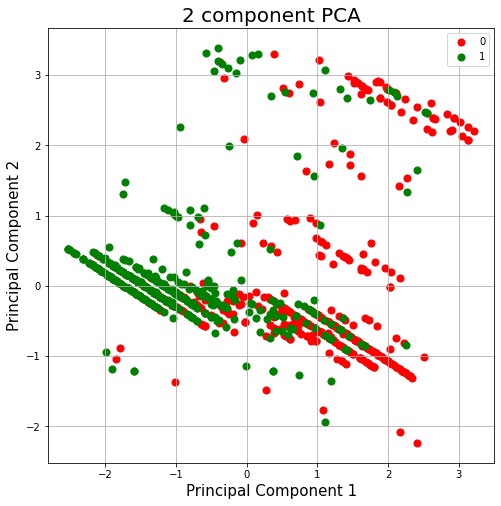

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

aims = [0,1]
colors = ['r', 'g']
for aim, color in zip(aims,colors):
    indicesToKeep = finalDf['Severity'] == aim
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(aims)
ax.grid()

In [ ]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(finalDf,target,test_size=0.2)
pca_y_train = np.ravel(pca_y_train)

In [ ]:
for j in range (1,16):
  knn4 = KNeighborsClassifier(n_neighbors = j)
  knn4.fit(pca_X_train, pca_y_train)
  knn_Y_predp = knn4.predict(pca_X_test)
  knn_accuracyp=metrics.accuracy_score(pca_y_test,knn_Y_predp)
  knn_accuracy_pcp=knn_accuracyp*100
  print("Error on training dataset of k = ",j , ": {:.2f}%".format(100-knn_accuracy_pcp) )

Error on training dataset of k =  1 : 0.00%
Error on training dataset of k =  2 : 0.00%
Error on training dataset of k =  3 : 0.00%
Error on training dataset of k =  4 : 0.00%
Error on training dataset of k =  5 : 0.00%
Error on training dataset of k =  6 : 0.52%
Error on training dataset of k =  7 : 0.52%
Error on training dataset of k =  8 : 0.52%
Error on training dataset of k =  9 : 0.52%
Error on training dataset of k =  10 : 0.52%
Error on training dataset of k =  11 : 0.52%
Error on training dataset of k =  12 : 0.52%
Error on training dataset of k =  13 : 0.52%
Error on training dataset of k =  14 : 0.52%
Error on training dataset of k =  15 : 0.52%


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = []
for l in range(1,16):
    knn6 = KNeighborsClassifier(n_neighbors=l)
    scores = cross_val_score(knn6, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append((l, scores.mean()))
best_k = max(cv_scores, key=lambda x: x[1])[0]
print('Best k:', best_k)
knn5 = KNeighborsClassifier(n_neighbors=best_k)
knn5.fit(X_train, y_train)
print('Testing accuracy:', knn5.score(X_test, y_test))

Best k: 8
Testing accuracy: 0.7854671280276817


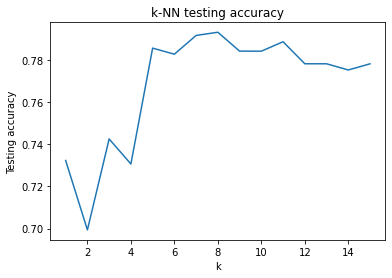

In [ ]:
ks, scores = zip(*cv_scores)
plt.plot(ks, scores)
plt.xlabel('k')
plt.ylabel('Testing accuracy')
plt.title('k-NN testing accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import LeaveOneOut
for t in range(1, 16):
  knn7 = KNeighborsClassifier(n_neighbors=t)
  loo = LeaveOneOut()
  looscores = cross_val_score(knn7, data, np.ravel(target), cv=loo)
  error = 1 - looscores.mean()
  print("Classification error of k = ", t,":", error)

Classification error of k =  1 : 0.2726326742976066
Classification error of k =  2 : 0.30280957336108216
Classification error of k =  3 : 0.23100936524453697
Classification error of k =  4 : 0.24037460978147762
Classification error of k =  5 : 0.23204994797086365
Classification error of k =  6 : 0.222684703433923
Classification error of k =  7 : 0.21748178980228927
Classification error of k =  8 : 0.2362122788761707
Classification error of k =  9 : 0.22372528616024978
Classification error of k =  10 : 0.23100936524453697
Classification error of k =  11 : 0.22060353798126953
Classification error of k =  12 : 0.22580645161290325
Classification error of k =  13 : 0.22684703433922992
Classification error of k =  14 : 0.22476586888657646
Classification error of k =  15 : 0.222684703433923
